In [22]:
import pandas as pd
from fbprophet import Prophet
from DatenSammlung import DatenVergangenheitHolen, FeiertageHolen, WetterVorhersageNBG
from DatenVerarbeitung import DatenVerarbeitung

from datetime import date

In [23]:
today = date.today()

In [3]:
df = DatenVerarbeitung()

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.
100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
C:\Users\j_kei\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
WetterVorhersage = WetterVorhersageNBG()

  0%|          | 0/1 [00:00<?, ?it/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   0%|          | 0.00/36.7M [00:00<?, ?iB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   2%|▏         | 768k/36.7M [00:00<00:04, 7.71MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   4%|▍         | 1.49M/36.7M [00:00<00:06, 5.94MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   6%|▌         | 2.19M/36.7M [00:00<00:05, 6.46MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   8%|▊         | 2.91M/36.7M [00:00<00:05, 6.80MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:  10%|▉         | 3.61M/36.7M [00:00<00:04, 6.97MiB/s]
https://opendata.dwd.de/weathe

In [28]:
df_test = df

In [29]:
trainings_zeitraum_von = '2020-8-01'
df_test = df_test.loc[df_test.index>trainings_zeitraum_von].copy()

<AxesSubplot:title={'center':'Trainingsdaten am 2021-04-08'}, xlabel='Date'>

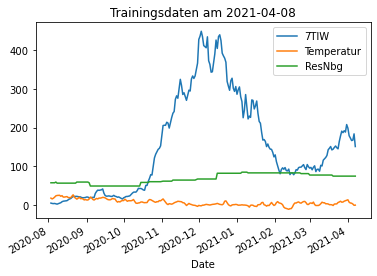

In [30]:
df_test.plot(title='Trainingsdaten am '+str(today))

In [31]:
df_test= df_test.rename(columns={"7TIW": "y"})
df_test = df_test.reset_index()
df_test= df_test.rename(columns={"Date": "ds"})

In [32]:
df_test

,ds,y,Temperatur,ResNbg
0,2020-08-03,5.598456,18.4,57.87
1,2020-08-04,4.633205,16.3,57.87
2,2020-08-05,4.247104,18.1,57.87
3,2020-08-06,4.633205,20.9,57.87
4,2020-08-07,3.861004,24.2,59.72
...,...,...,...,...
234,2021-04-03,173.166023,5.8,75.00
235,2021-04-04,166.602317,5.3,75.00
236,2021-04-05,167.567568,3.2,75.00
237,2021-04-06,183.783784,-0.1,75.00


In [33]:
m = Prophet(changepoint_prior_scale=2)
m.add_country_holidays(country_name='DE')
m.add_regressor('Temperatur')
m.add_regressor('ResNbg')
m.fit(df_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
#WetterVorhersage.head(20)

In [35]:
future = m.make_future_dataframe(periods=10,include_history=False)
future = future.set_index('ds')
#future.tail(20)

In [36]:
future['Temperatur'] = future.join(WetterVorhersage)
future['ResNbg'] = 75
future = future.reset_index()

In [37]:
#future.tail(20)

In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5,2021-04-13,205.692347,182.854369,227.442576
6,2021-04-14,203.721548,180.489397,228.094013
7,2021-04-15,209.675418,181.383270,236.946010
8,2021-04-16,213.246914,182.377304,245.787631
9,2021-04-17,216.241940,178.016728,255.017574


Text(0.5, 1.0, '2021-04-08')

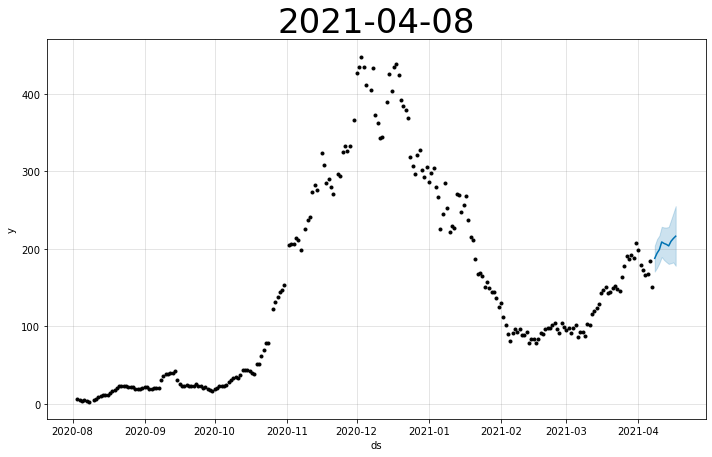

In [39]:
fig = m.plot(forecast)
ax = fig.gca()
ax.set_title(today, size=34)

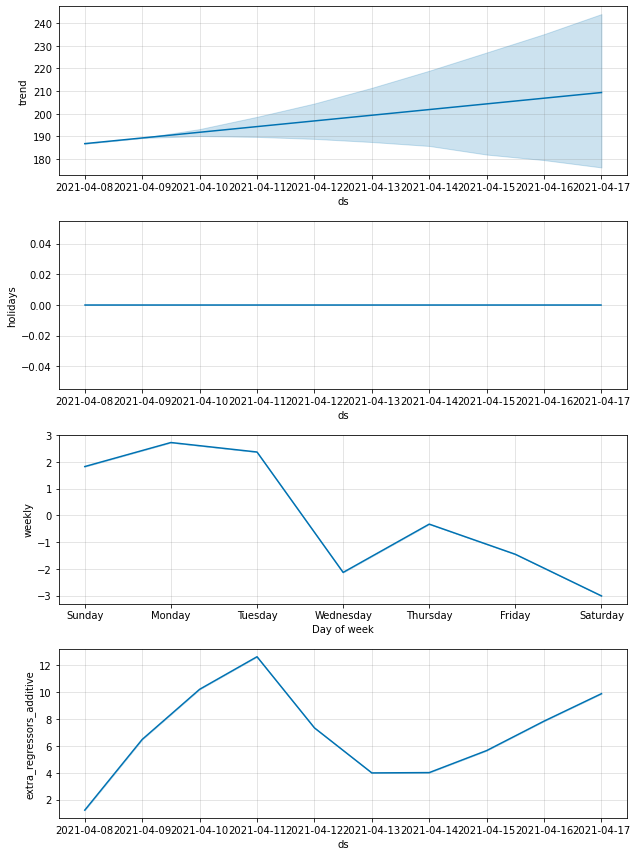

In [40]:
fig2 = m.plot_components(forecast)